## Quick Links
* [Data Preprocessing](#data-preprocess)
* [Training and Test Sets](#train-test)
* [Feature Scaling](#feature-scaling)
* [K Nearest Neighbors Regression](#knn)
* [Random Forest Regression](#rfr)
* [Ridge Regression](#ridge)
* [Kernelized Ridge Regression](#kridge)
* [Comparing Our Models](#compare)
* [On-line Prediction](#online)

## Necessary Imports

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Loading the Dataset

In [2]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
boston = pd.read_csv('./Datasets/Boston Housing Dataset/housing.csv', header = None, delimiter = r'\s+', names = feature_names)

## Shape of the Dataset

In [4]:
boston.shape

(506, 14)

## Checking Stats of the Dataset

In [5]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<a id='data-preprocess'></a>
## Checking for missing values 

In [6]:
boston.isnull().sum() # Dataset has no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Converting the Dtype of all columns to $\verb|float64|$

In [8]:
boston = boston.astype('float64')

In [9]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## First 5 Samples of the Dataset<a id = 'first'></a>

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Relationship between the Features and Label

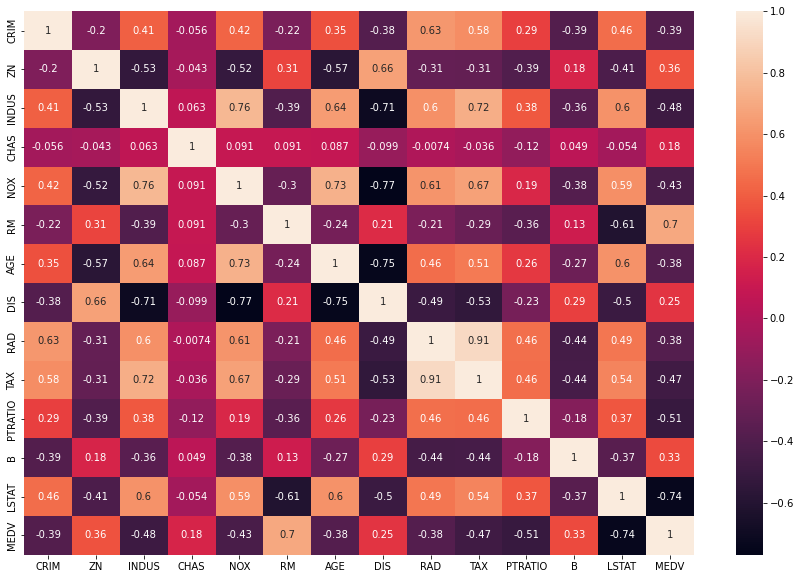

In [11]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(boston.corr(),annot = True);

## Splitting the Data into Features (X) and Target (y)

In [12]:
X_boston = boston.drop('MEDV', axis = 1)
X_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y_boston = boston['MEDV']
y_boston.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

<a id='train-test'></a>
## Splitting the Data into Training and Test Sets 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, random_state = 42)

<a id='feature-scaling'></a>
## Normalizing the Data using StandardScaler 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [16]:
pd.DataFrame(X_train_scaled_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.406795,-0.502812,-1.247076,-0.287849,-0.591174,1.156255,0.833235,-0.503753,-0.740571,-1.280208,-0.205157,0.404512,-1.077756
1,0.007992,-0.502812,1.218283,3.474042,2.628380,-0.238475,0.486246,-0.956440,-0.507741,-0.013937,-1.576252,-3.098037,0.351165
2,-0.413450,0.364381,-1.121792,-0.287849,-0.970291,2.080976,-0.167973,0.441388,-0.507741,-1.141522,-1.487795,0.326591,-1.226252
3,-0.371107,-0.502812,2.092391,-0.287849,0.190598,-0.987986,0.956127,-0.950895,-0.856986,-1.310358,0.369819,0.005983,2.065870
4,-0.409661,-0.502812,-1.134753,-0.287849,-0.826546,0.013216,-1.877617,0.687804,-0.624156,0.148869,-0.603217,0.188141,-0.724729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,-0.397140,-0.502812,-0.368648,-0.287849,-0.322177,-0.677892,0.822392,-0.735808,-0.507741,-0.128504,1.165939,0.422247,0.861093
375,-0.381729,0.364381,-0.599055,-0.287849,-0.792921,-0.650081,-0.977614,0.315455,-0.740571,-1.099312,0.148674,0.341924,0.068182
376,-0.415951,2.965961,-1.311878,-0.287849,-1.036700,0.433164,-1.425808,2.171042,-0.624156,-0.755610,-0.558988,0.368126,-0.913851
377,0.926381,-0.502812,1.005156,-0.287849,1.527175,0.424821,0.919983,-0.776711,1.704142,1.571917,0.856337,-2.848141,1.506909


In [17]:
# We need to reset the index for the labels because StandardScaler resets the indexes of the features
y_train.reset_index(drop = True, inplace=True)
y_test.reset_index(drop = True, inplace=True)

<a id='knn'></a>
## Fitting K Nearest Neighbors Regression Model to the Dataset

In [18]:
from KNN import KNNRegressor

### Searching for best parameters

In [19]:
best_score = 0.0
best_n_neighbors = 1
best_distance_func = 2
best_weighted = False

n_neighbors = range(1, 11)

start = time.time()
for n in n_neighbors:
    for d in [1,2]:
        for w in [True, False]:
            # Build the model
            knn = KNNRegressor(n_neighbors = n, distance_type = d, weighted = w)
            knn.fit(X_train_scaled_df, y_train)
            current_score = knn.score(X_test_scaled_df, y_test)
            if current_score > best_score:
                best_score = current_score
                best_n_neighbors = n
                best_distance_func = d
                best_weighted = w

                
print(f'\nThat took {np.round((time.time() - start)/60)} minute(s).')                
print(f'\nBest value for n_neighbors: {best_n_neighbors}')
print(f'Best distance function: {best_distance_func}')
print(f'Weighted: {best_weighted}')
print(f'Best Score:{best_score}')

KNNRegressor(n_neighbors=1, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=1, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = True)
KNNRegressor(n_neighbors=4, distance_type = 1, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 2, weighted = True)
KNNRegressor(n_neighbors=4, dista

In [20]:
knn_score = best_score
knn_score

0.7742672278926411

### How the scores change with respect to the number of neighbors

In [21]:
train_score = []
test_score = []

neighbors = range(1, 11)

start = time.time()
for n in neighbors:
    # Build the model
    knn = KNNRegressor(n_neighbors=n, distance_type = best_distance_func, weighted = best_weighted)
    knn.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(knn.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(knn.score(X_test_scaled_df, y_test))
    
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

KNNRegressor(n_neighbors=1, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=2, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=3, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=4, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=5, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=6, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=7, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=8, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=9, distance_type = 2, weighted = False)
KNNRegressor(n_neighbors=10, distance_type = 2, weighted = False)
That took 0.0 minute(s).


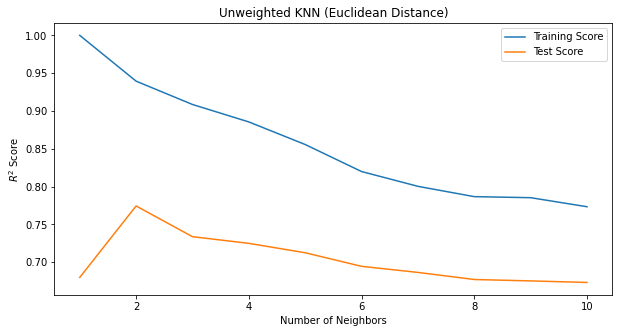

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(n_neighbors, train_score, label = 'Training Score')
ax.plot(n_neighbors, test_score, label = 'Test Score')
ax.set(xlabel = 'Number of Neighbors',
       ylabel = '$R^2$ Score',
       title = 'Unweighted KNN (Euclidean Distance)')
ax.legend();

<a id='rfr'></a>
## Using Random Forest Regression 

In [23]:
# Maximum number of features to consider at each node
p = int(np.ceil(X_train.shape[1]/3))

In [24]:
from RFR import RandomForestRegressor

### Searching for the model with the best parameters and best score

In [25]:
best_score = 0.0
best_n_estimators = 50
best_min_samples_split = 5
best_max_depth = 5

num_trees = [50, 100, 150, 200, 250]
samples = [5, 50, 100, 150, 200]
depths = [5, 10, 15, 20, 25, 30]

start = time.time()
for n in num_trees:
    for s in samples:
        for d in depths:
            # Build the model
            rf = RandomForestRegressor(n_estimators=n, min_samples_split = s, max_depth = d, max_features = p)
            rf.fit(X_train_scaled_df, y_train)
            current_score = rf.score(X_test_scaled_df, y_test)
            if current_score > best_score:
                best_score = current_score
                best_n_estimators = n
                best_min_samples_split = s
                best_max_depth = d
                
print(f'That took {np.round((time.time() - start)/60)} minute(s).')
        
print(f'\nBest value for n_estimators: {best_n_estimators}')
print(f'Best value for min_samples_split: {best_min_samples_split}')
print(f'Best value for max_depth: {best_max_depth}')
print(f'Best Score: {best_score}')

That took 71.0 minute(s).

Best value for n_estimators: 100
Best value for min_samples_split: 5
Best value for max_depth: 25
Best Score: 0.8517834812317369


In [26]:
rf_score = best_score
rf_score

0.8517834812317369

### $R^2$ Scores with varying n_estimators

In [27]:
train_score = []
test_score = []

num_trees = [50, 100, 150, 200, 250]


start = time.time()
for n in num_trees:
    # Build the model
    rf = RandomForestRegressor(n_estimators = n, 
                               min_samples_split = best_min_samples_split, 
                               max_depth = best_max_depth,
                               max_features = p)
    rf.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(rf.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(rf.score(X_test_scaled_df, y_test))
    
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

That took 5.0 minute(s).


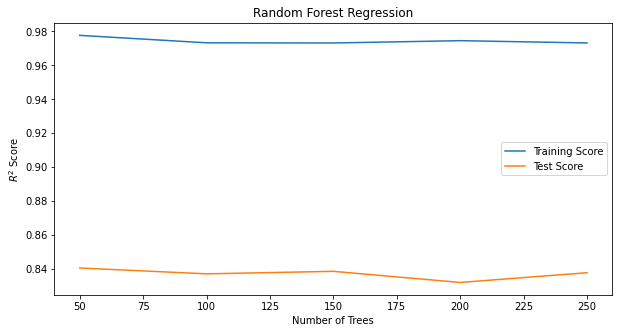

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(num_trees, train_score, label = 'Training Score')
ax.plot(num_trees, test_score, label = 'Test Score')
ax.set(xlabel = 'Number of Trees',
       ylabel = '$R^2$ Score',
       title = 'Random Forest Regression')
ax.legend();

### $R^2$ Scores with varying min_samples_split

In [29]:
train_score = []
test_score = []

samples = [5, 50, 100, 150, 200]

start = time.time()
for s in samples:
    # Build the model
    rf = RandomForestRegressor(n_estimators = best_n_estimators, 
                               min_samples_split = s, 
                               max_depth = best_max_depth, 
                               max_features=p)
    rf.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(rf.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(rf.score(X_test_scaled_df, y_test))
    
print(f'That took {np.round((time.time() - start)/60)} minute(s).')

That took 1.0 minute(s).


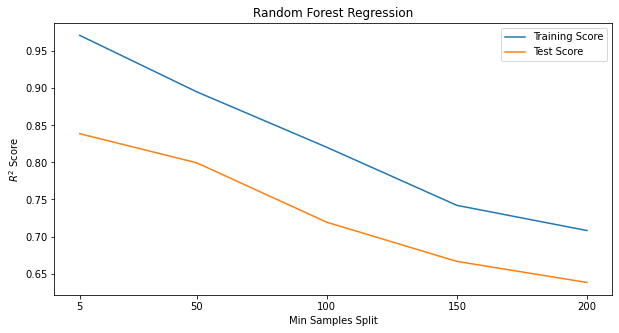

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(samples, train_score, label = 'Training Score')
ax.plot(samples, test_score, label = 'Test Score')
ax.set(xlabel = 'Min Samples Split',
       ylabel = '$R^2$ Score',
       xticks =samples,
       title = 'Random Forest Regression')
ax.legend();

### $R^2$ Scores with varying max_depth

In [31]:
train_score = []
test_score = []

depths = [5, 10, 15, 20, 25, 30]

start = time.time()
for d in depths:
    # Build the model
    rf = RandomForestRegressor(n_estimators = best_n_estimators, 
                               min_samples_split = best_min_samples_split, 
                               max_depth = d, 
                               max_features = p)
    rf.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(rf.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(rf.score(X_test_scaled_df, y_test))

print(f'That took {np.round((time.time() - start)/60)} minute(s).')

That took 3.0 minute(s).


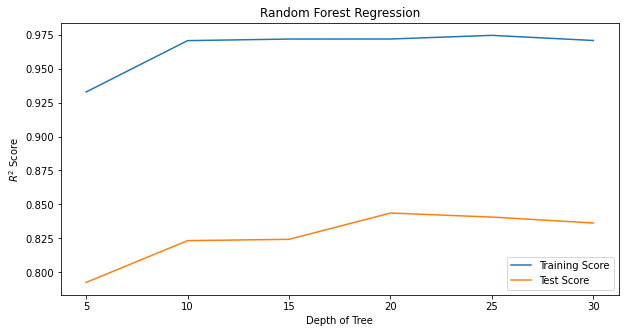

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(depths, train_score, label = 'Training Score')
ax.plot(depths, test_score, label = 'Test Score')
ax.set(xlabel = 'Depth of Tree',
       ylabel = '$R^2$ Score',
       xticks = depths,
       title = 'Random Forest Regression')
ax.legend();

<a id = 'ridge'></a>
## Using Ridge Regression

In [19]:
from RR import RidgeRegression

In [20]:
best_score = 0.0
best_alpha = 1

alphas = [0.1, 1, 10, 50, 100, 1000]

for a in alphas:
    rr = RidgeRegression(alpha = a)
    rr.fit(X_train_scaled_df, y_train)
    current_score = rr.score(X_test_scaled_df, y_test)
    if current_score > best_score:
        best_score = current_score
        best_alpha = a
        
print(f'\nBest value of alpha: {best_alpha}')
print(f'Best Score: {best_score}')


Best value of alpha: 0.1
Best Score: 0.6844008362928345


In [21]:
rr_score = best_score
rr_score

0.6844008362928345

### Checking $R^2$ Scores for Different Alphas

In [22]:
train_score = []
test_score = []

alphas = [0.1, 1, 10, 50, 100, 1000]

for alpha in alphas:
    # Build the model
    reg = RidgeRegression(alpha = alpha)
    reg.fit(X_train_scaled_df, y_train)
    # Record Training Score
    train_score.append(reg.score(X_train_scaled_df, y_train))
    # Record Test Score
    test_score.append(reg.score(X_test_scaled_df, y_test))

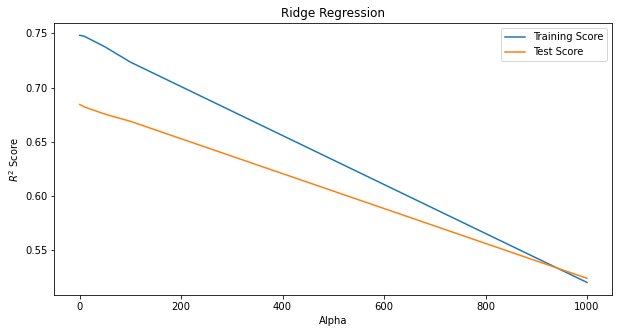

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(alphas, train_score, label = 'Training Score')
ax.plot(alphas, test_score, label = 'Test Score')
ax.set(xlabel = 'Alpha',
       ylabel = '$R^2$ Score',
       title = 'Ridge Regression')
ax.legend();

### Weights for the features

In [24]:
rr.coef_

array([-0.43219598,  0.26584567, -0.43916044,  0.4327906 , -0.36881538,
        1.34233784, -0.25966435, -0.07972836, -0.25530388, -0.42224582,
       -0.76247721,  0.43667497, -1.2435523 ])

### Intercept

In [25]:
rr.intercept_

22.907915567282323

### Displaying the weights in a more readable format

In [26]:
df = pd.DataFrame(rr.coef_, feature_names[0:13], columns=['Weights'])
df

,Weights
CRIM,-0.432196
ZN,0.265846
INDUS,-0.439160
CHAS,0.432791
NOX,-0.368815
RM,1.342338
AGE,-0.259664
DIS,-0.079728
RAD,-0.255304
TAX,-0.422246


<a id='kridge'></a>
## Using Kernelized Ridge Regression

In [27]:
from KernelizedRR import KernelizedRidgeRegression

### Linear Kernel

In [28]:
krr_linear = KernelizedRidgeRegression(kernel='linear', alpha = best_alpha) 

In [29]:
krr_linear.fit(X_train_scaled_df, y_train)

In [30]:
krr_linear_score = krr_linear.score(X_test_scaled_df, y_test)
krr_linear_score

-7.0108321418913535

### Polynomial Kernel

In [31]:
best_degree, best_coef, best_score = 3, 1, 0.0
for d in [2, 3, 4, 5, 6]:
    for c in [1, 2, 5, 10, 15]:
        krr = KernelizedRidgeRegression(kernel = 'polynomial', degree=d, coef0=c)
        krr.fit(X_train_scaled_df, y_train)
        current_score = krr.score(X_test_scaled_df, y_test)
        if current_score > best_score:
            best_degree = d
            best_coef = c
            best_score = current_score

print(f'Best Degree: {best_degree}')
print(f'Best Coef0: {best_coef}')
print(f'Best Score: {best_score}')

Best Degree: 3
Best Coef0: 2
Best Score: 0.8286687606504263


In [32]:
krr_poly_score = best_score
krr_poly_score

0.8286687606504263

### Radial Basis Kernel

In [33]:
krr_rbf = KernelizedRidgeRegression(kernel='rbf')

In [34]:
krr_rbf.fit(X_train_scaled_df, y_train)

In [35]:
krr_rbf_score = krr_rbf.score(X_test_scaled_df, y_test)
krr_rbf_score

0.7326765716896875

<a id='compare'></a>
## Comparing Our Models

In [36]:
scores = [knn_score, rf_score, rr_score, krr_linear_score, krr_poly_score, krr_rbf_score]
score_labels = ['KNN', 'Random Forest', 'Ridge', 'Linear Kernel', 'Polynomial Kernel', 'Radial Kernel']

In [37]:
# Storing the sort indices 
sort_indices = np.argsort(scores)

# Sorting the scores array
scores = np.sort(scores)

In [38]:
# Sorting the array of labels according to the sort indices for the scores array
score_labels = np.array(score_labels)[sort_indices]

In [39]:
# Array of hexa codes for the bar colors
bar_colors = ['#eff3ff','#c6dbef','#9ecae1', '#6baed6', '#3182bd', '#08519c']

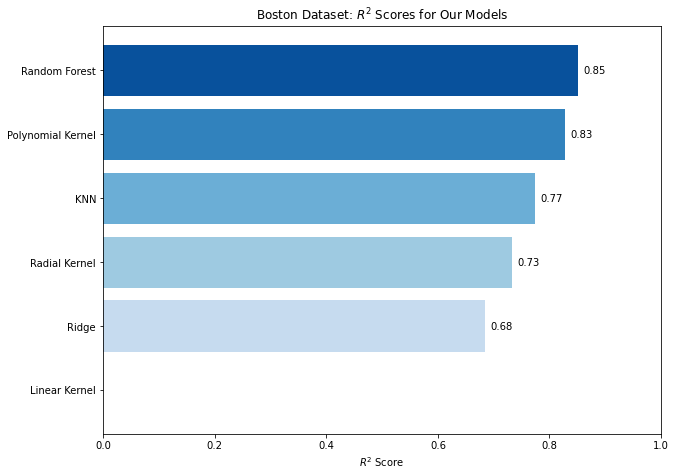

In [40]:
# Plotting R2 Scores for our models
fig, ax = plt.subplots(figsize=(10,7.5))
bars = ax.barh(score_labels, scores, color = bar_colors);
ax.bar_label(bars, fmt='%.2f', padding = 5);
ax.set(xlim = (0,1),
       xlabel ='$R^2$ Score',
       title = 'Boston Dataset: $R^2$ Scores for Our Models');

<a id = 'online'></a>
## Online Prediction

In [55]:
from OnlineLR import OnlineLinearRegression

In [56]:
olr = OnlineLinearRegression(n_features = X_boston.shape[1])
y_preds = []
T = X_boston.shape[0]

In [57]:
for t in range(T):
    # Observe the sample at time t and make a prediction
    prediction = olr.predict(X_boston.iloc[t])
    # Store the prediction that we have made
    y_preds.append(prediction)
    # Calculate Loss and Update Weights
    olr.update_weights(y_boston[t], prediction)

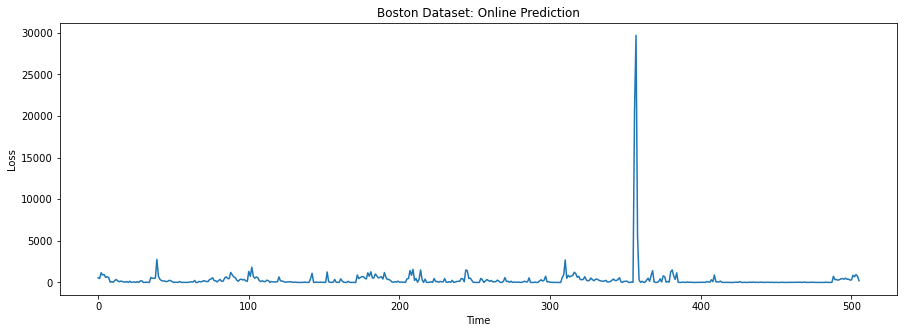

In [58]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(olr.losses)
ax.set(xlabel = 'Time',
       ylabel = 'Loss',
       title = 'Boston Dataset: Online Prediction');

### Cumulative Loss

In [59]:
olr.cumulative_loss_

178449.73573892968